In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

# Samsung

In [17]:
samsung1 = pd.read_csv('merge_data/samsung_merge1.csv',parse_dates = ['date'])

In [18]:
samsung1 = samsung1.drop(0,axis=0).reset_index(drop=True) # 10월 31일 제외

In [21]:
remove_idx = []
for idx,(c,u,d) in enumerate(zip(samsung1['samsung_change'],samsung1['up_count'],samsung1['down_count'])):
    if c == '0.00%':
        samsung1['up_count'][idx-1] += u
        samsung1['down_count'][idx-1] += d
        remove_idx.append(idx)
samsung1 = samsung1.drop(remove_idx,axis=0)

In [24]:
samsung1['samsung_change'] = samsung1['samsung_change'].apply(lambda x: 1 if float(x[:-1]) > 0 else 0)
samsung1

,date,samsung_price,samsung_change,up_count,down_count
0,2021-10-29,69800,0,1,3
1,2021-10-28,70700,1,7,0
2,2021-10-27,70100,0,1,2
3,2021-10-26,71100,1,0,1
4,2021-10-25,70200,0,5,6
...,...,...,...,...,...
243,2021-01-08,88800,1,20,9
244,2021-01-07,82900,1,13,13
245,2021-01-06,82200,0,15,9
246,2021-01-05,83900,1,22,5


In [162]:
train_x = samsung1[['samsung_price','up_count','down_count']]
train_y = samsung1[['samsung_change']]

In [163]:
train_x

,samsung_price,up_count,down_count
0,69800,1,3
1,70700,7,0
2,70100,1,2
3,71100,0,1
4,70200,5,6
...,...,...,...
243,88800,20,9
244,82900,13,13
245,82200,15,9
246,83900,22,5


In [362]:
test = pd.read_csv('test_data/samsung_11.csv')
test_investing = pd.read_excel('test_data/samsung_investing_test.xlsx')

In [363]:
from datetime import datetime

In [364]:
test['날짜'] = test['날짜'].apply(lambda x: datetime.strptime(x,'%Y년 %m월 %d일'))
test_investing['date'] = pd.to_datetime(test_investing['date'])

In [365]:
test = test[['날짜','종가','변동 %']]
test.columns = ['date','price','change']

In [368]:
test = pd.merge(test,test_investing,on='date')

In [51]:
train_x['react_score'] = train_x['up_count'] - train_x.down_count

In [54]:
train_x.drop(['up_count','down_count'],axis=1,inplace = True)

In [56]:
remove_idx = []
for idx,(c,u,d) in enumerate(zip(test['change'],test['up_count'],test['down_count'])):
    if c == '0.00%':
        test['up_count'][idx-1] += u
        test['down_count'][idx-1] += d
        remove_idx.append(idx)
test = test.drop(remove_idx,axis=0)

In [58]:
test['change'] = test['change'].apply(lambda x: 1 if float(x[:-1])>0 else 0)

In [124]:
test['react_score'] = test.up_count - test.down_count

In [129]:
test[['price','react_score']]

,price,react_score
0,"71,400",6
2,"70,600",-1
3,"69,900",1
4,"70,200",0
5,"70,500",0
6,"70,600",3
8,"70,200",-2
9,"70,600",1
10,"70,400",-2
11,"71,500",3


In [137]:
test['price'] = test['price'].apply(lambda x: float(x.replace(',','')))

In [172]:
test_x = test[['price','up_count','down_count']]
test_y = test[['change']]

In [ ]:
# train_x : price,up_cnt,-down_cnt

In [214]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
print(accuracy_score(test_y,pred))

0.6363636363636364
[1 0 0 0 0 0 0 0 0 0 1]


Text(0.5, 1.0, 'Smasung predict(RandomForest)')

<Figure size 864x576 with 0 Axes>

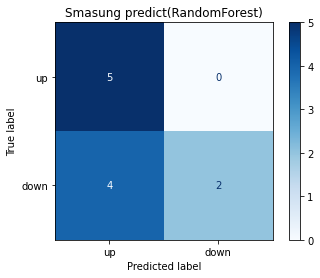

In [217]:
from sklearn.metrics import plot_confusion_matrix
label = ['up','down']


plt.figure(figsize = (12,8))
plot = plot_confusion_matrix(rf, # 분류 모델
                             test_x, test_y, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label,cmap = plt.get_cmap('Blues'))
plt.title('Smasung predict(RandomForest)')


In [216]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(train_x,train_y)
pred = lgbm.predict(test_x)
print(accuracy_score(test_y,pred))


0.45454545454545453


Text(0.5, 1.0, 'Smasung predict(LGBM)')

<Figure size 864x576 with 0 Axes>

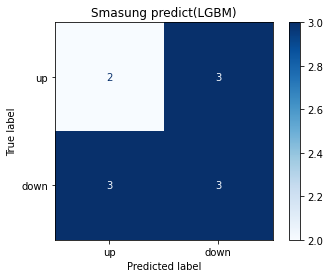

In [219]:
from sklearn.metrics import plot_confusion_matrix
label = ['up','down']


plt.figure(figsize = (12,8))
plot = plot_confusion_matrix(lgbm, # 분류 모델
                             test_x, test_y, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label,cmap = plt.get_cmap('Blues'))
plt.title('Smasung predict(LGBM)')


In [184]:
samsung1['react_score'] = samsung1['up_count'] - samsung1['down_count']

Text(0.5, 1.0, 'Smasung predict(RandomForest)')

<Figure size 864x576 with 0 Axes>

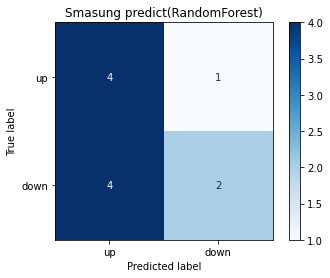

In [157]:
from sklearn.metrics import plot_confusion_matrix
label = ['up','down']


plt.figure(figsize = (12,8))
plot = plot_confusion_matrix(rf, # 분류 모델
                             test_x, test_y, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label,cmap = plt.get_cmap('Blues'))
plt.title('Smasung predict(RandomForest)')

## 점수로

In [221]:
train_x = samsung1[['samsung_price','react_score']]
test_x = test[['price','react_score']]

In [223]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
print(accuracy_score(test_y,pred))

0.2727272727272727


In [224]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(train_x,train_y)
pred = lgbm.predict(test_x)
print(accuracy_score(test_y,pred))

0.5454545454545454


In [192]:
from sklearn.preprocessing import StandardScaler
samsung2 = samsung1.copy()
scaler = StandardScaler()
samsung2['samsung_price'] = scaler.fit_transform(samsung1['samsung_price'].values.reshape(-1,1))

In [195]:
test2 = test.copy()
test2['price'] = scaler.fit_transform(test['price'].values.reshape(-1,1))

In [200]:
train_x3 = samsung2[['samsung_price','up_count','down_count']]
test_x3 = test2[['price','up_count','down_count']]

In [201]:
rf.fit(train_x3,train_y)
accuracy_score(test_y,rf.predict(test_x3))

0.7272727272727273

In [225]:
lgbm.fit(train_x3,train_y)
accuracy_score(test_y,lgbm.predict(test_x3))

0.5454545454545454

In [206]:
x_train = samsung2['samsung_price'].values.reshape(-1,1)
x_test = test2['price'].values.reshape(-1,1)

In [226]:
rf.fit(x_train,train_y)
accuracy_score(test_y,rf.predict(x_test))

0.36363636363636365

In [227]:
lgbm.fit(x_train,train_y)
accuracy_score(test_y,lgbm.predict(x_test))

0.7272727272727273

In [228]:
x_train2 = samsung2[['samsung_price','react_score']]
x_test2 = test2[['price','react_score']]

In [230]:
rf.fit(x_train2,train_y)
accuracy_score(test_y,rf.predict(x_test2))

0.6363636363636364

In [232]:
lgbm.fit(x_train2,train_y)
accuracy_score(test_y,lgbm.predict(x_test2))

0.7272727272727273

In [233]:
x_train3 = samsung2[['samsung_price','up_count','down_count']]
x_test3 = test2[['price','up_count','down_count']]

In [235]:
x_train3['down_count'] = -x_train3['down_count']
x_test3['down_count'] = x_test3['down_count']

In [236]:
rf.fit(x_train3,train_y)
accuracy_score(test_y,rf.predict(x_test3))

0.7272727272727273

In [237]:
lgbm.fit(x_train3,train_y)
accuracy_score(test_y,lgbm.predict(x_test3))

0.6363636363636364

### 뉴스 반응 추가

In [348]:
news_react = pd.read_csv('bert_data/final_bert_samsung.csv',parse_dates=['date'])

In [349]:
news_react.columns = ['date','news_up','news_down']

In [341]:
news_react_test = pd.read_csv('bert_data/test/final_samsung_bert_test.csv')

In [356]:
samsung_merge = pd.read_csv('merge_data/samsung_merge1.csv',parse_dates = ['date'])

In [360]:
samsung = pd.merge(samsung_merge,news_react,on='date')


In [372]:
samsung['samsung_change'] = samsung['samsung_change'].apply(lambda x: float(x[:-1]))
samsung.to_csv('final_data/samsung_train.csv',index=False)

In [375]:
news_react_test.columns = ['date','news_up_count','news_down_count']

In [377]:
test['date'] = pd.to_datetime(test['date'])

In [381]:
news_react_test['date'] = pd.to_datetime(news_react_test['date'])

In [ ]:
samsung_test = pd.merge(test,news_react_test,on='date',how='left')
samsung_test['change'] = samsung_test['change'].apply(lambda x: float(x[:-1]))

In [388]:
samsung_test['price'] = samsung_test['price'].apply(lambda x: float(x.replace(',','')))

In [390]:
samsung_test.to_csv('final_data/samsung_test.csv',index=False)

## Naver

In [240]:
naver_stock = pd.read_csv('stock_price/pre_naver_1_10.csv',parse_dates = ['date'])
naver_stock['naver_change'] = naver_stock['naver_change'].apply(lambda x: float(x[:-1]))
remove_idx = []
for idx,i in enumerate(naver_stock['naver_change']):
    if i == 0:
        remove_idx.append(idx)
naver_stock.drop(remove_idx,axis=0,inplace=True)

In [242]:
naver_stock['naver_change'] = naver_stock['naver_change'].apply(lambda x: 1 if x>0 else 0)

In [265]:
test_naver_stock = pd.read_csv('test_data/pre_naver_11.csv',parse_dates=['date'])

<AxesSubplot:xlabel='date', ylabel='price'>

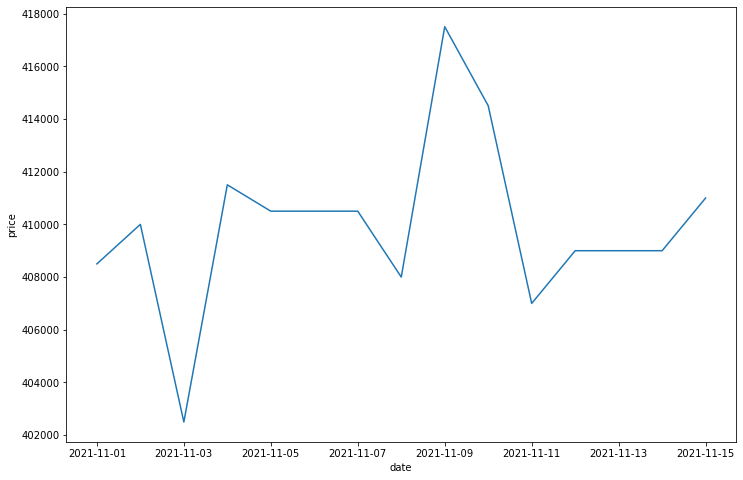

In [268]:
plt.figure(figsize=(12,8))
sns.lineplot(test_naver_stock['date'],test_naver_stock['price'])

In [250]:
test_naver_stock['change'] = test_naver_stock['change'].apply(lambda x: float(x[:-1]))
remove_idx = []
for idx,i in enumerate(test_naver_stock['change']):
    if i == 0:
        remove_idx.append(idx)
test_naver_stock.drop(remove_idx,axis=0,inplace=True)

In [252]:
test_naver_stock['change'] = test_naver_stock['change'].apply(lambda x: 1 if x>0 else 0)

In [266]:
test_naver_stock['price'] = test_naver_stock['price'].apply(lambda x: float(x.replace(',','')))

In [253]:
# 가격만

In [262]:
train_x = naver_stock['naver_price'].values.reshape(-1,1)
train_y = naver_stock['naver_change']
test_x = test_naver_stock['price'].values.reshape(-1,1)
test_y = test_naver_stock['change']

In [263]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.5454545454545454

In [264]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.5454545454545454

In [269]:
scale_train_x = StandardScaler().fit_transform(train_x)
scale_test_x = StandardScaler().fit_transform(test_x)

In [270]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(scale_train_x,train_y)
accuracy_score(test_y,rf.predict(scale_test_x))

0.7272727272727273

In [271]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(scale_train_x,train_y)
accuracy_score(test_y,lgbm.predict(scale_test_x))

0.9090909090909091

In [275]:
naver_investing = pd.read_csv('investing/nhn-corp_investing.csv')
naver_investing.up_count.sum()

229

In [276]:
naver_investing.down_count.sum()

77

In [279]:
def show_height(ax,fontsize=20):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=fontsize)

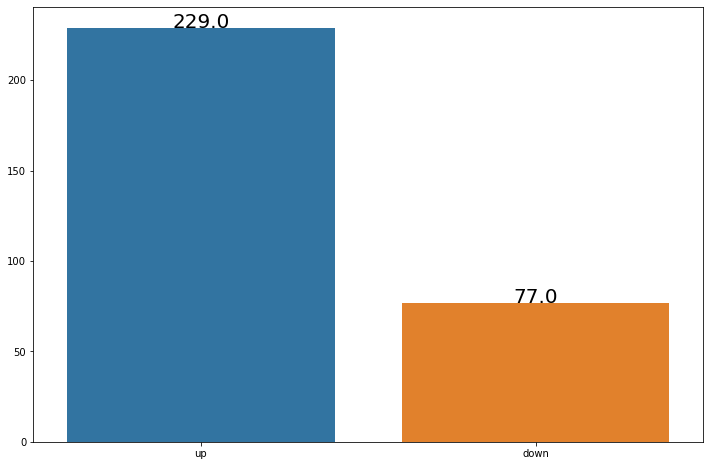

In [281]:
plt.figure(figsize=(12,8))
ax = sns.barplot(['up','down'],[naver_investing.up_count.sum(),naver_investing.down_count.sum()])
show_height(ax)

In [286]:
naver_investing['date'] = pd.to_datetime(naver_investing['date'])

In [393]:
naver_stock = pd.read_csv('stock_price/pre_naver_1_10.csv',parse_dates = ['date'])
merge_naver = pd.merge(naver_stock,naver_investing,on='date',how='left')

In [305]:
merge_naver['down_count'] = -merge_naver['down_count']

In [308]:
remove_idx = []
for idx,i in enumerate(merge_naver['naver_change']):
    if float(i[:-1]) == 0:
        remove_idx.append(idx)
merge_naver.drop(remove_idx,axis=0,inplace=True)

In [311]:
train_x = merge_naver[['naver_price','up_count','down_count']]
len(train_x) == len(train_y)

True

In [312]:
test_investing = pd.read_excel('test_data/naver_investing_test.xlsx',parse_dates = ['date'])

In [316]:
test_naver = pd.merge(test_naver_stock,test_investing,on='date')

In [318]:
remove_idx = []
for idx,i in enumerate(test_naver['change']):
    if float(i[:-1]) == 0:
        remove_idx.append(idx)
test_naver.drop(remove_idx,axis=0,inplace=True)

In [321]:
test_x = test_naver[['price','up_count','down_count']]

In [322]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.6363636363636364

In [323]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.5454545454545454

In [325]:
scale_train_x = StandardScaler().fit_transform(train_x)
scale_test_x = StandardScaler().fit_transform(test_x)

In [326]:
rf.fit(scale_train_x,train_y)
accuracy_score(test_y,rf.predict(scale_test_x))

0.5454545454545454

In [327]:
lgbm.fit(scale_train_x,train_y)
accuracy_score(test_y,lgbm.predict(scale_test_x))

0.5454545454545454

In [329]:
test_x

,price,up_count,down_count
0,411000.0,0,0
2,409000.0,0,0
3,407000.0,0,0
4,414500.0,0,0
5,417500.0,0,0
6,408000.0,1,0
8,410500.0,0,0
9,411500.0,1,0
10,402500.0,0,0
11,410000.0,0,0


In [407]:
bert_naver = pd.read_csv('bert_data/final_bert_naver.csv',parse_dates = ['date'])

In [408]:
bert_naver = bert_naver.sort_values('date').reset_index(drop=True)

In [414]:
bert_naver.columns = ['date','news_up_count','news_down_count']

In [416]:
naver=pd.merge(merge_naver,bert_naver,on='date',how = 'left')

In [418]:
naver['naver_change'] = naver['naver_change'].apply(lambda x: float(x[:-1]))

In [420]:
naver.to_csv('final_data/naver_train.csv',index=False)

In [423]:
bert_naver_test = pd.read_csv('bert_data/test/final_naver_bert_test.csv',parse_dates = ['date'])

In [431]:
bert_naver_test.columns = ['date','news_up_count','news_down_count']

In [436]:
naver_test = pd.merge(test_naver,bert_naver_test,on='date',how='left')
naver_test['change'] = naver_test['change'].apply(lambda x: float(x[:-1]))
naver_test.to_csv('final_data/naver_test.csv',index=False)

In [441]:
## 셀트리온

In [444]:
celltrion_price = pd.read_csv('stock_price/pre_celltrion_1_10.csv',parse_dates = ['date'])


In [445]:
celltrion_bert = pd.read_csv('bert_data/celltrion_news1.csv')

,pred,label
0,0.0,NaN
1,0.0,NaN
2,1.0,NaN
3,1.0,NaN
4,0.0,NaN
5,0.0,NaN
6,1.0,NaN
7,1.0,NaN
8,0.0,NaN
